In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'C:\Users\jaums\OneDrive\Área de Trabalho\competitions\test.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
#preprocessing bruto (direto no pandas)
traindf = train.copy()
traindf['Alley'] = train['Alley'].fillna('No Alley Access')
traindf['BsmtQual'] = traindf['BsmtQual'].fillna('No Basement')
traindf['BsmtCond'] = traindf['BsmtCond'].fillna('No Basement')
traindf['BsmtExposure'] = traindf['BsmtExposure'].fillna('No Basement')
traindf['BsmtFinType1'] = traindf['BsmtFinType1'].fillna('No Basement')
traindf['BsmtFinType2'] = traindf['BsmtFinType2'].fillna('No Basement')
traindf['FireplaceQu'] = traindf['FireplaceQu'].fillna('No Fireplace')
traindf['GarageType'] = traindf['GarageType'].fillna('No Garage')
traindf['GarageFinish'] = traindf['GarageFinish'].fillna('No Garage')
traindf['GarageQual'] = traindf['GarageQual'].fillna('No Garage')
traindf['GarageCond'] = traindf['GarageCond'].fillna('No Garage')
traindf['PoolQC'] = traindf['PoolQC'].fillna('No Pool')
traindf['Fence'] = traindf['Fence'].fillna('No Fence')
traindf['MiscFeature'] = traindf['MiscFeature'].fillna('None')
traindf['MasVnrType'] = traindf['MasVnrType'].fillna('None')

#colocando os NaN numéricos.
traindf['LotFrontage'] = traindf['LotFrontage'].fillna(0)
traindf['GarageYrBlt'] = traindf['GarageYrBlt'].fillna(0)
traindf['MasVnrArea'] = traindf['MasVnrArea'].fillna(0)
traindf['Electrical'] = traindf['Electrical'].fillna('Not Stated')

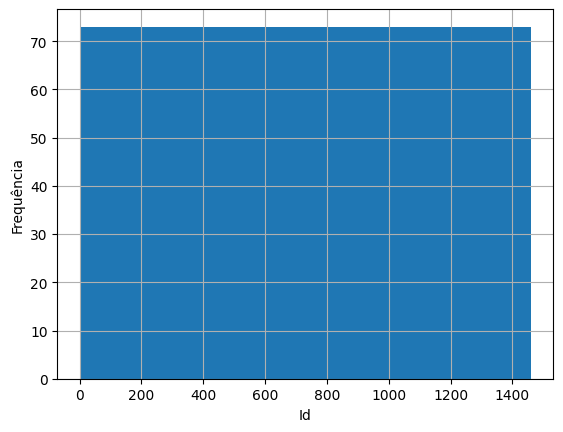

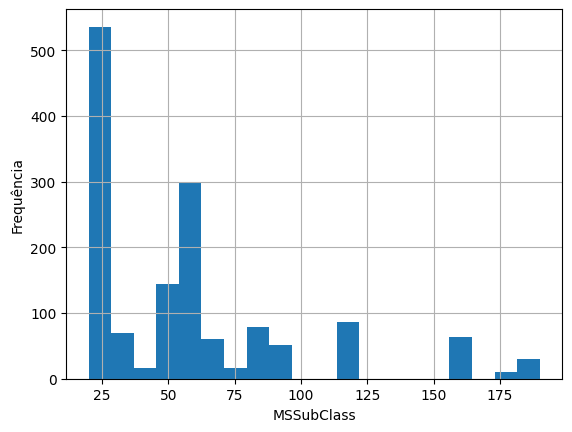

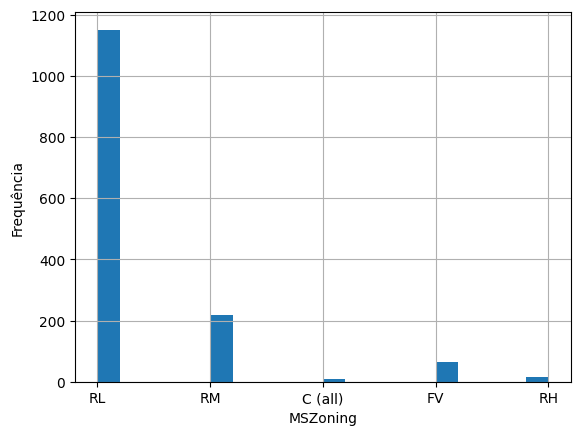

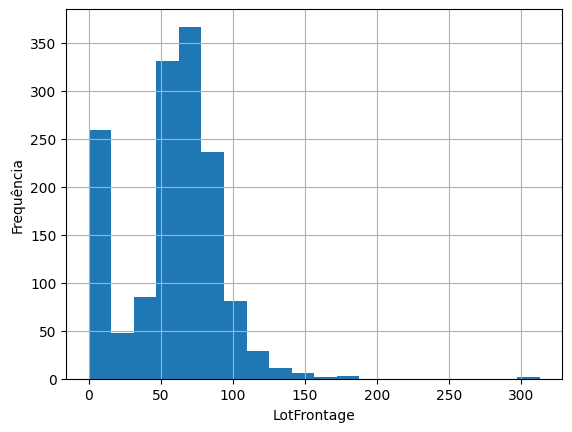

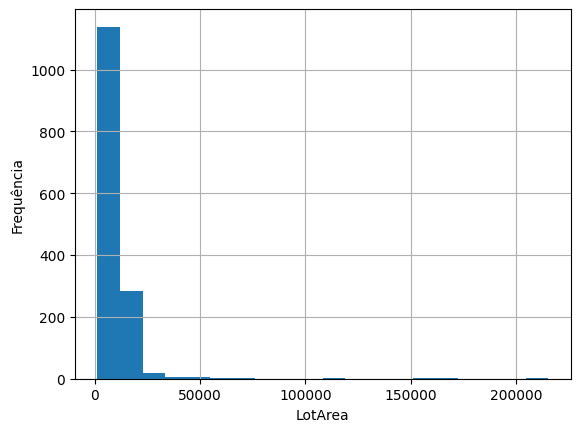

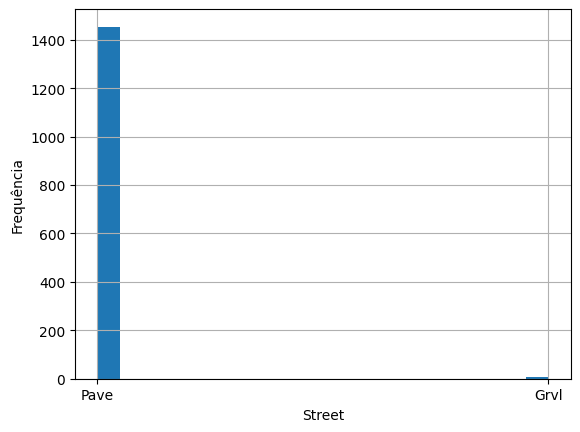

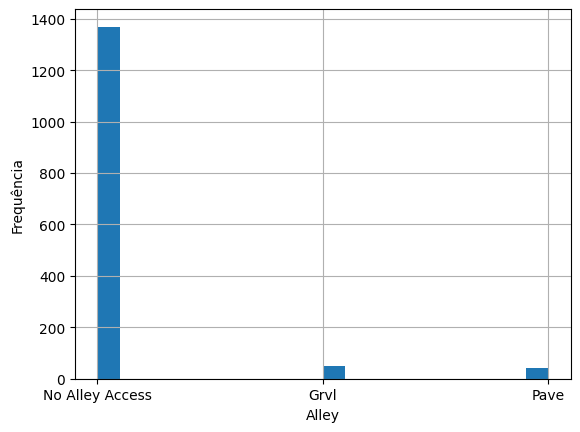

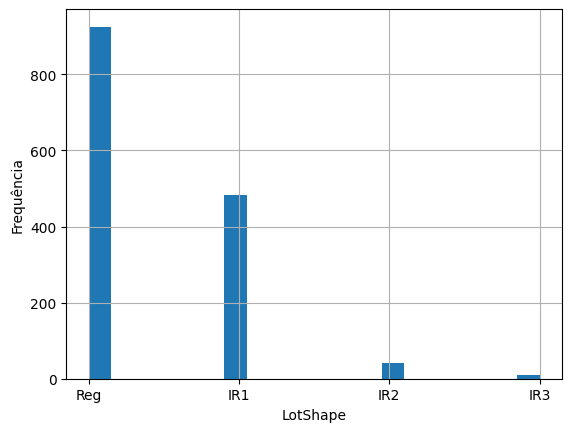

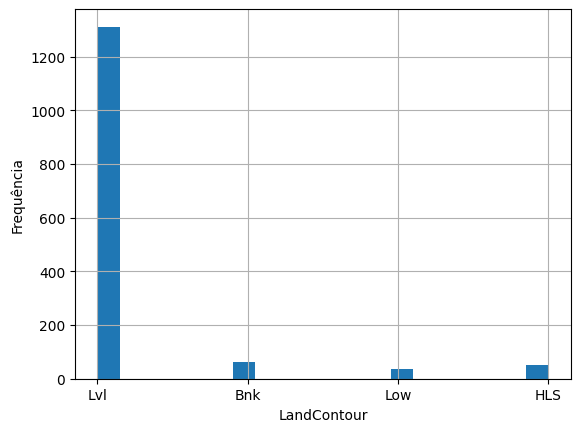

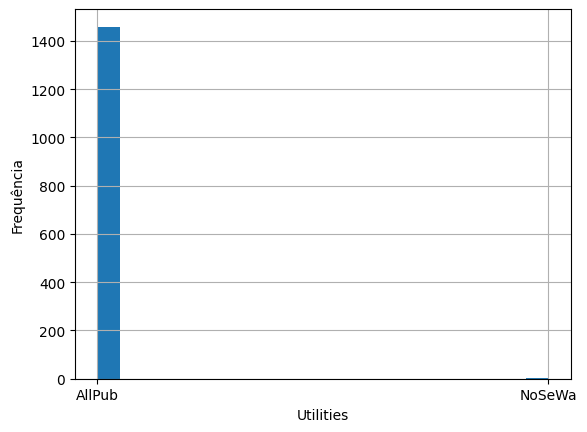

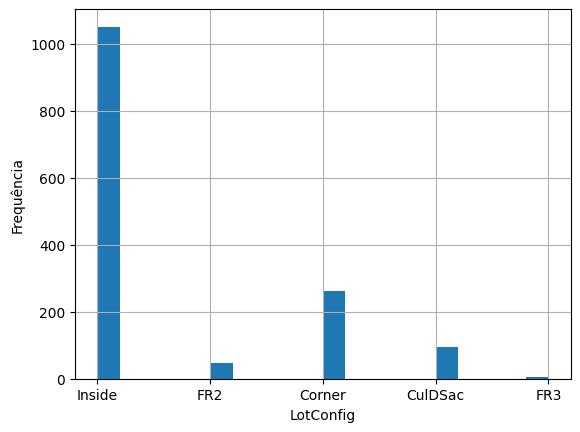

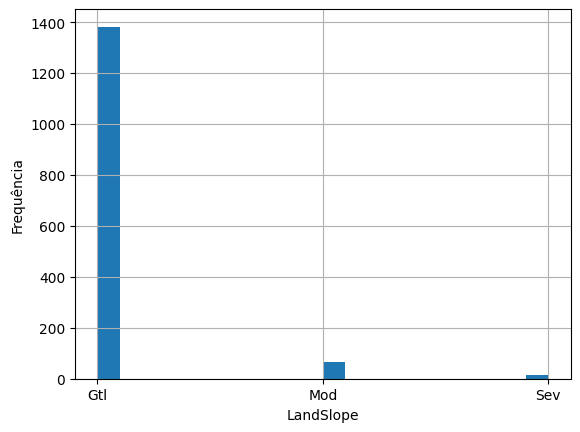

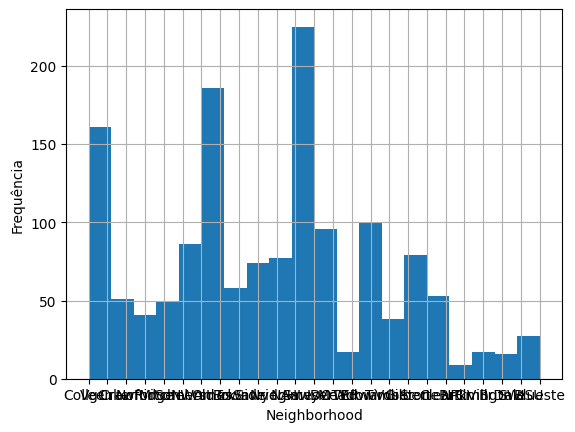

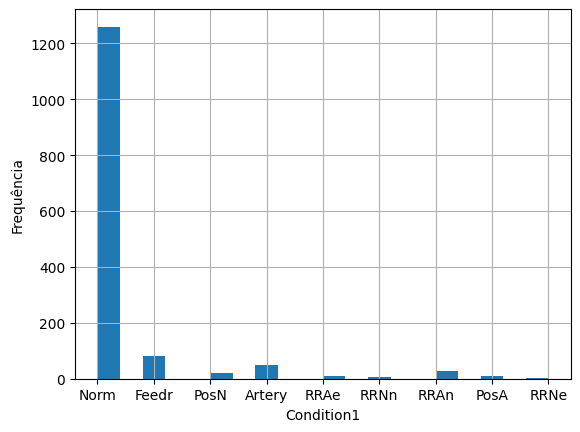

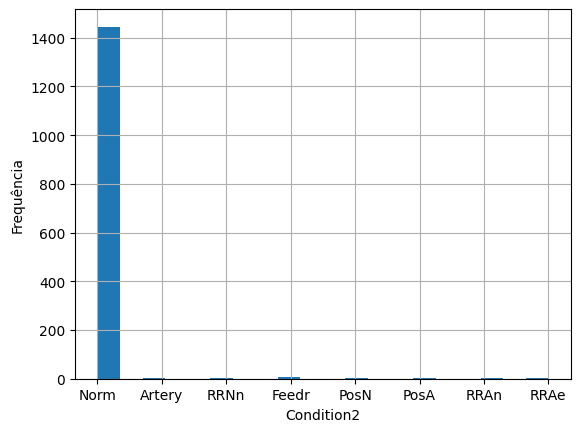

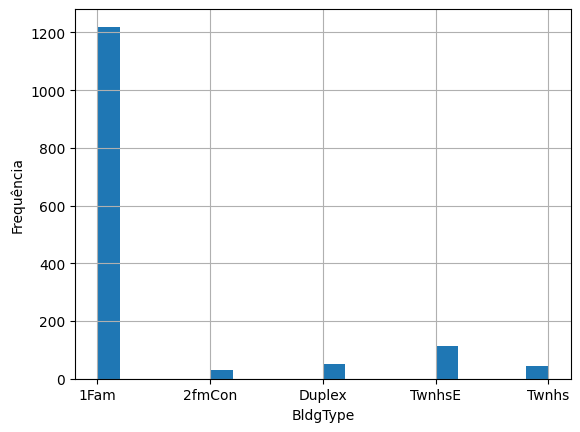

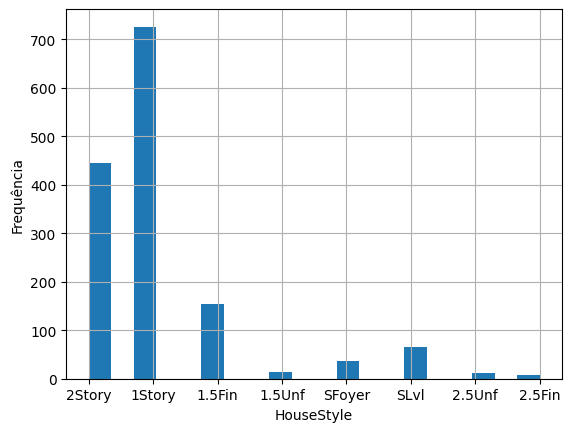

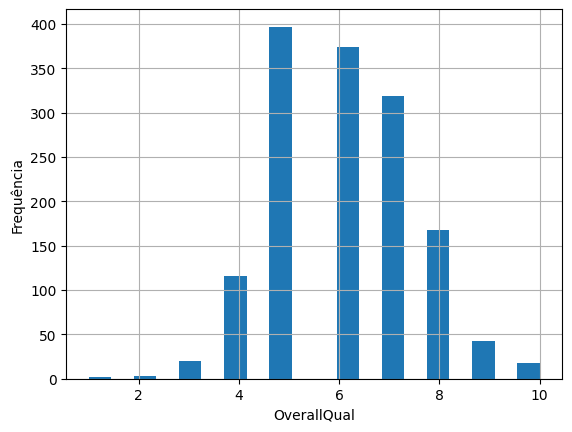

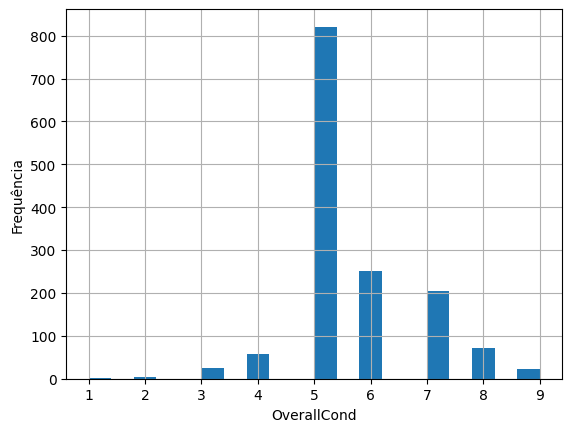

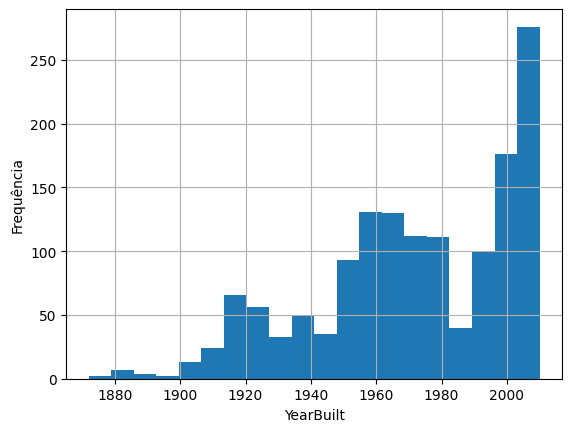

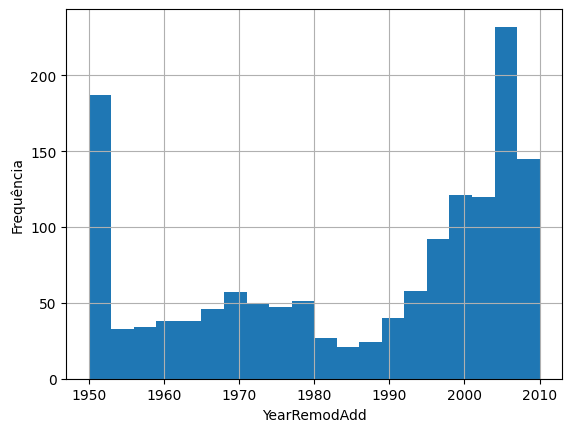

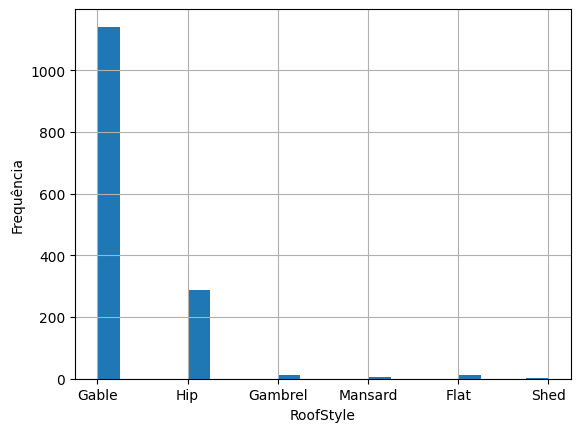

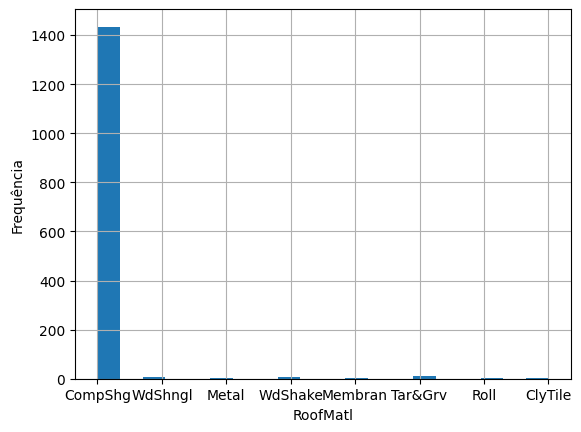

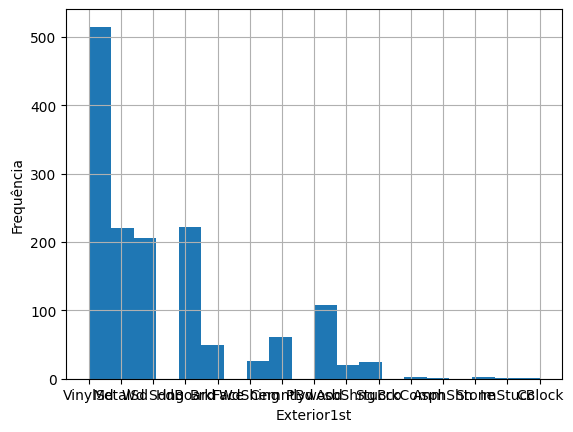

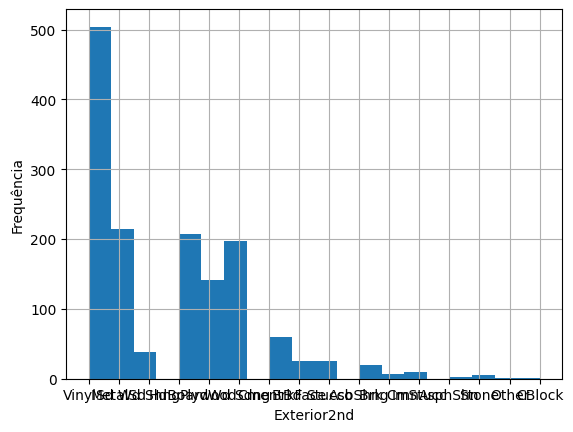

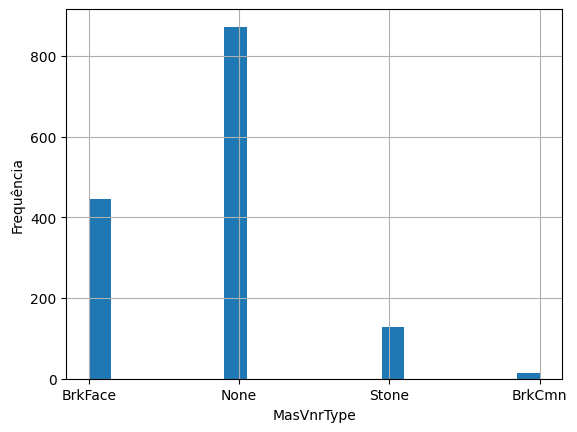

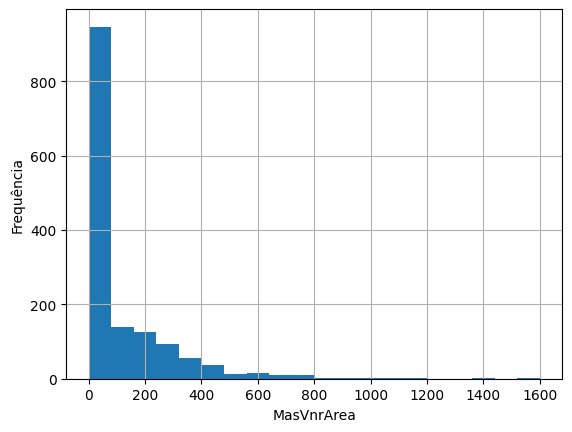

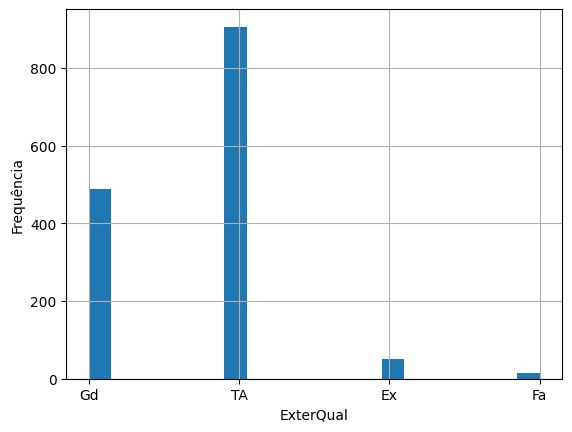

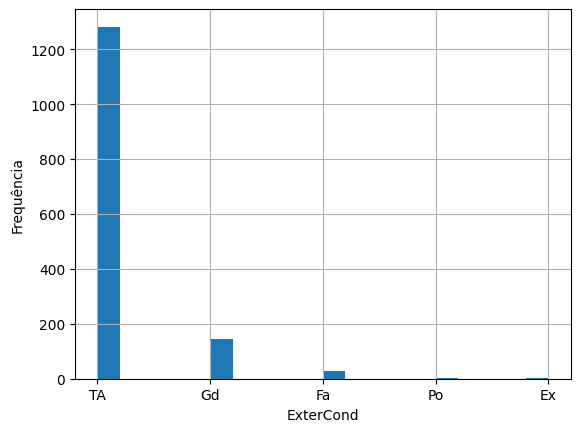

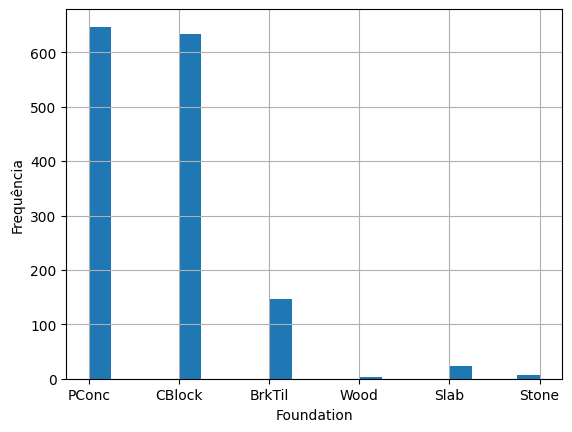

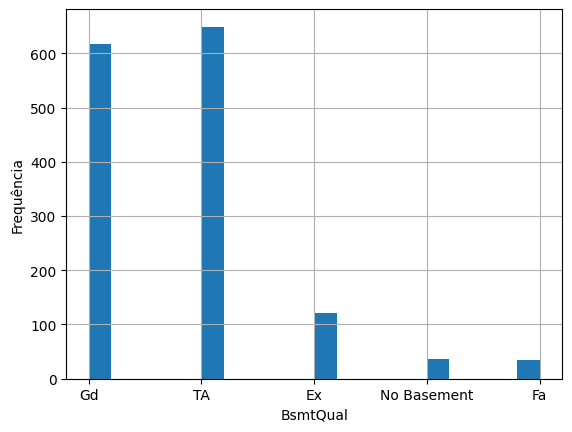

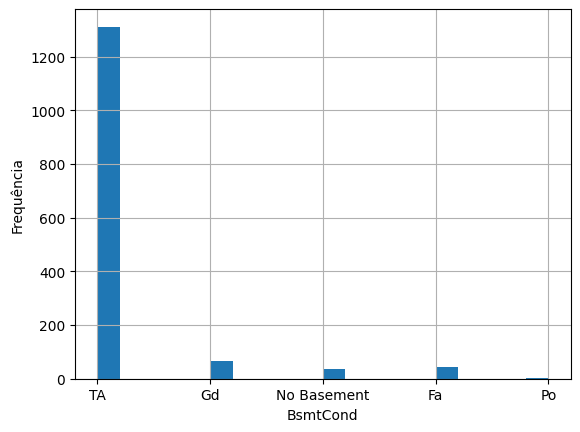

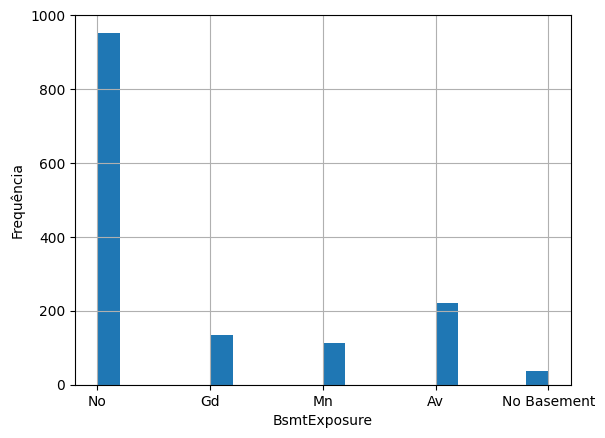

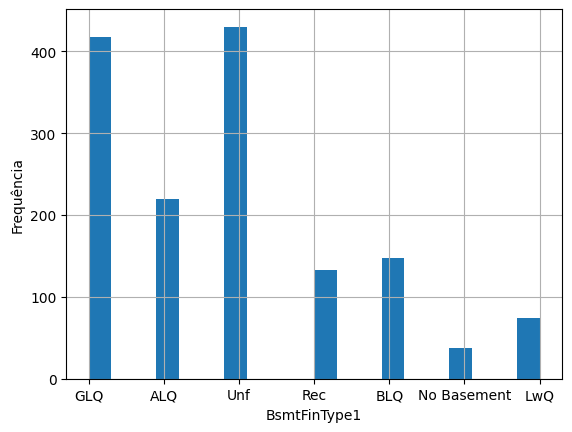

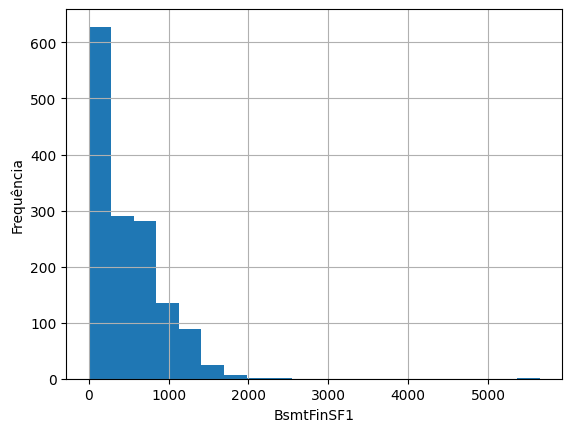

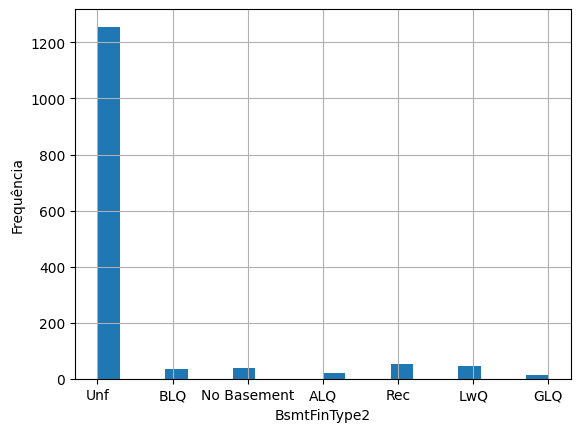

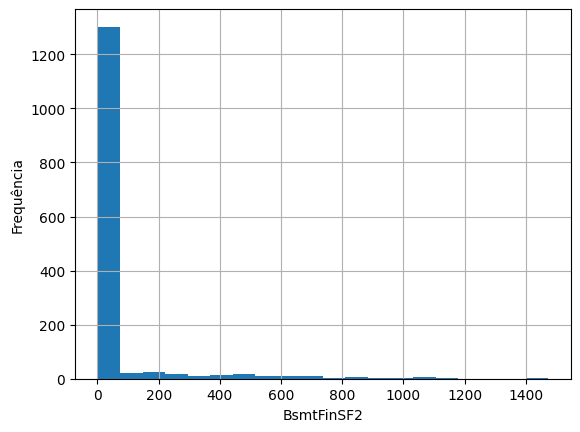

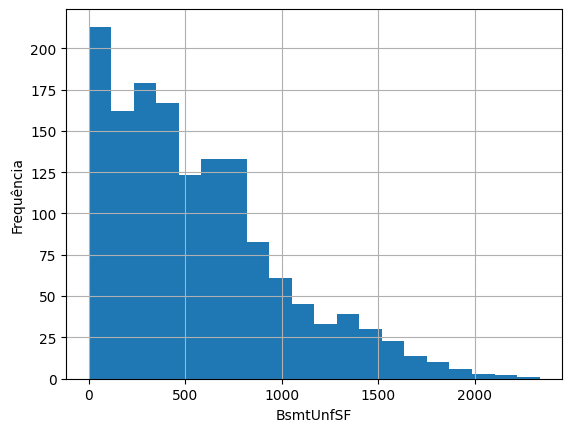

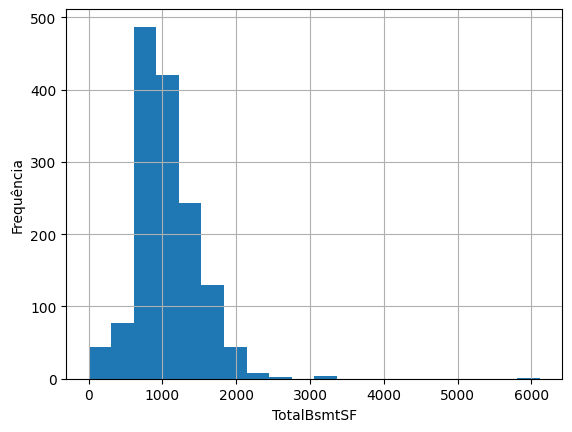

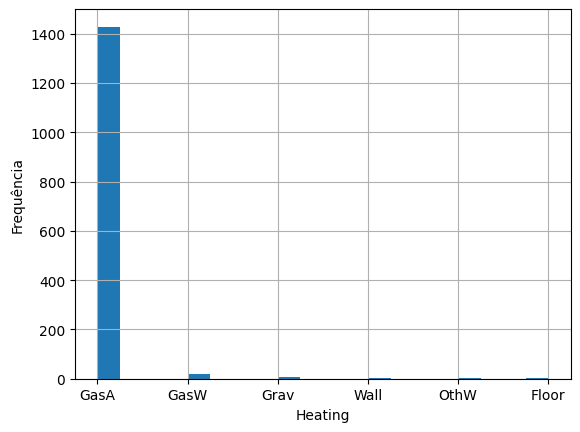

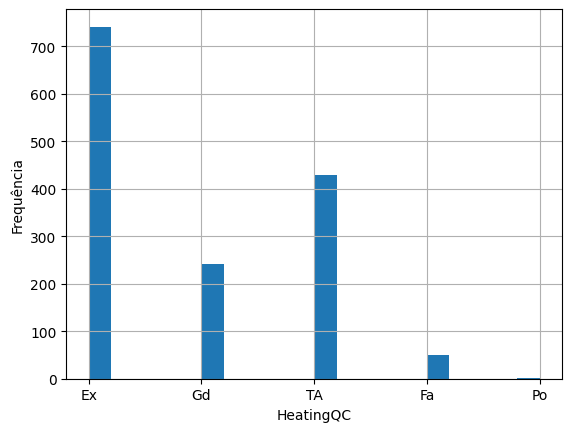

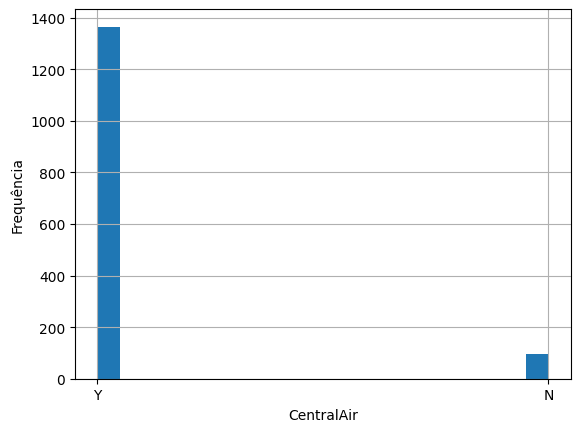

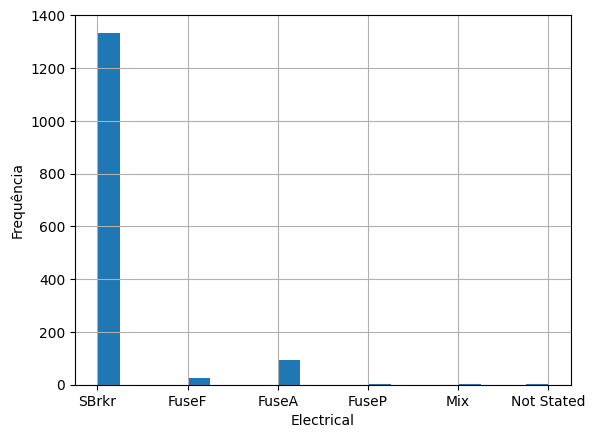

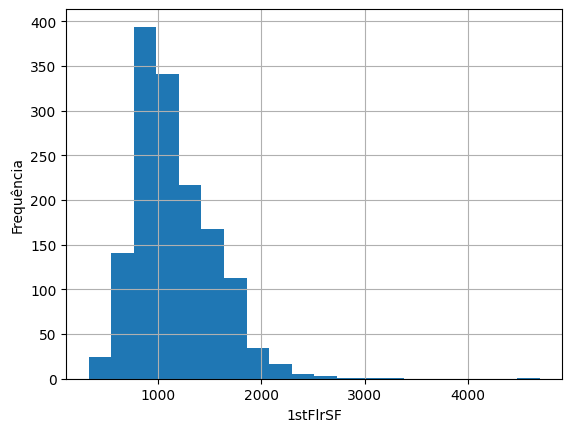

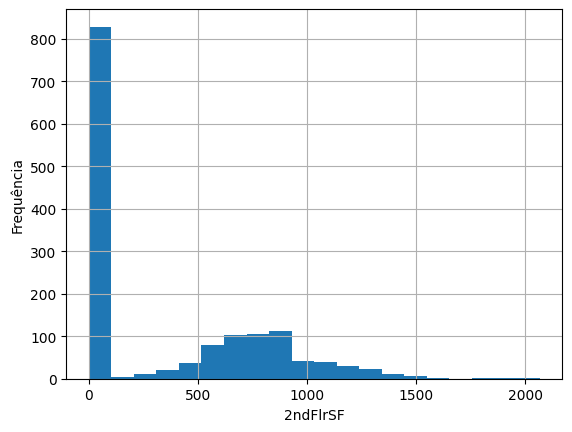

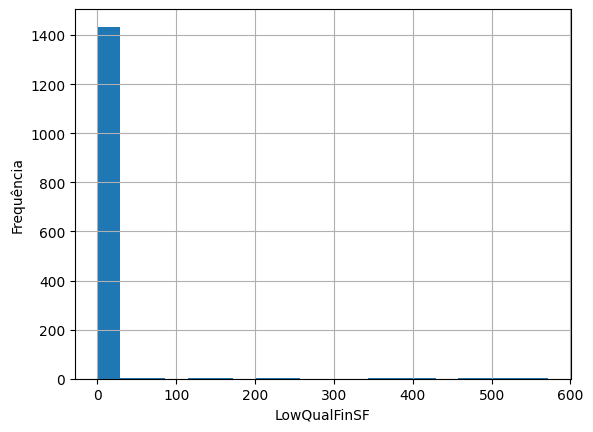

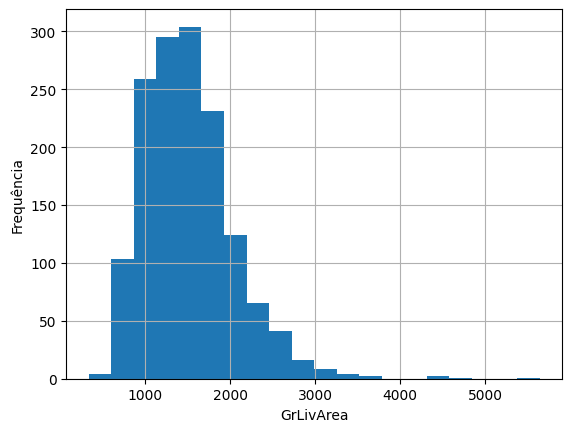

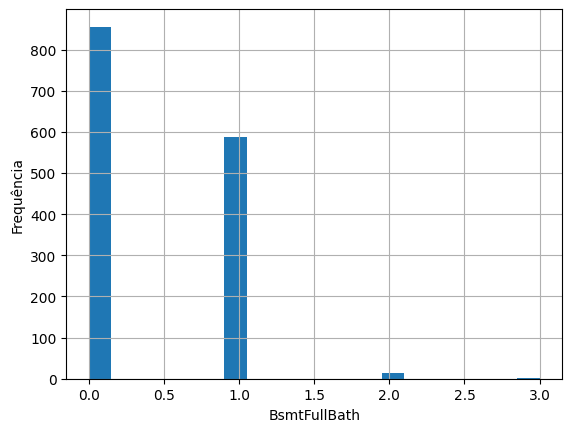

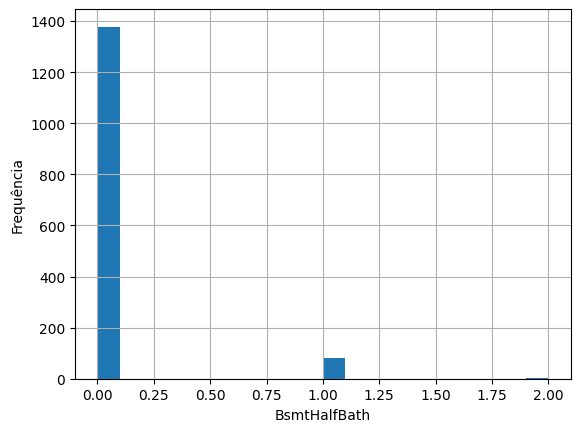

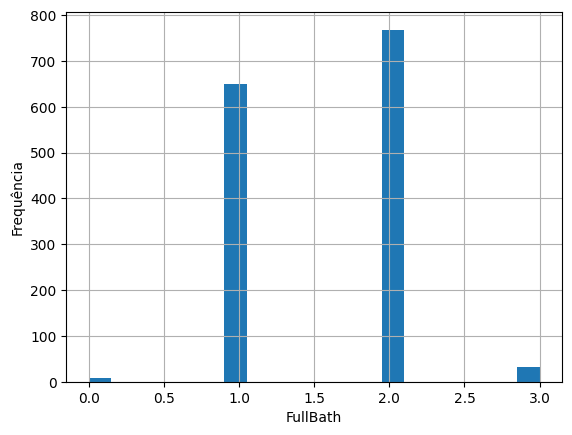

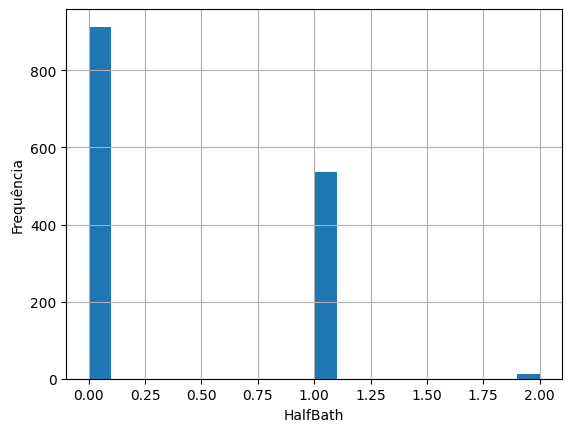

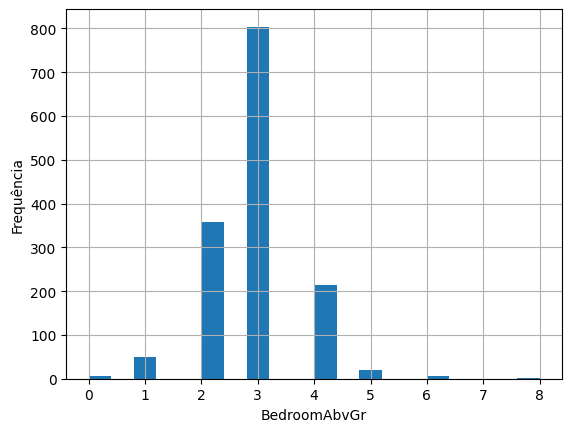

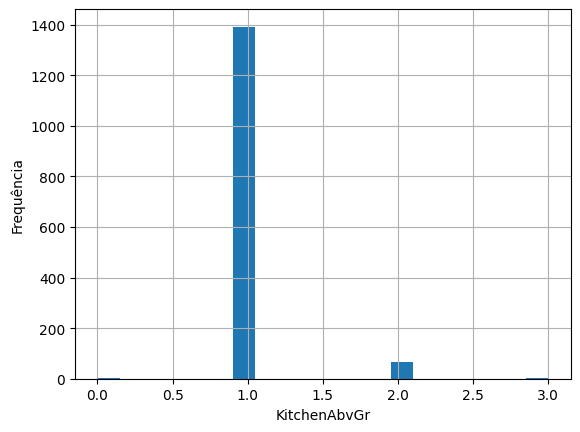

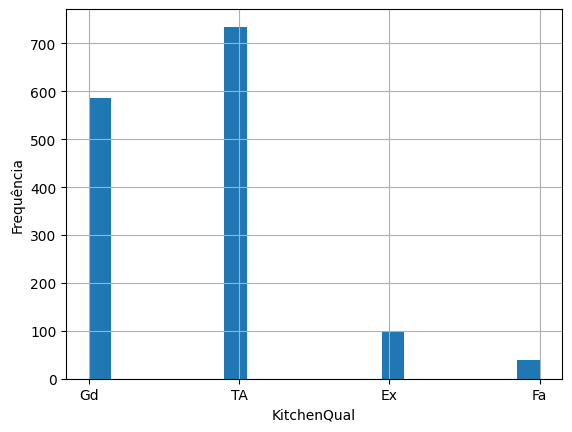

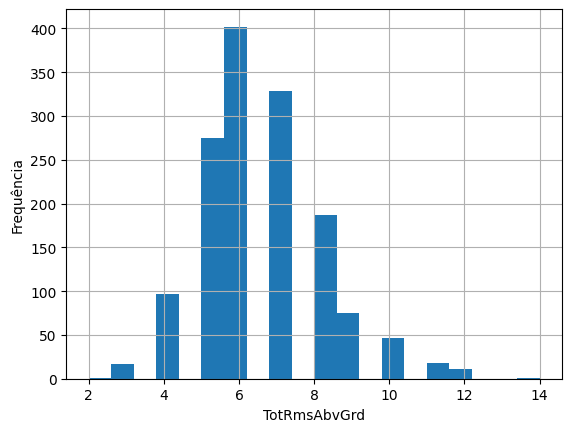

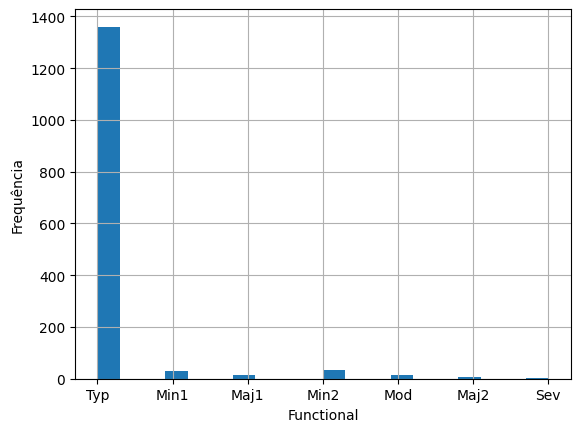

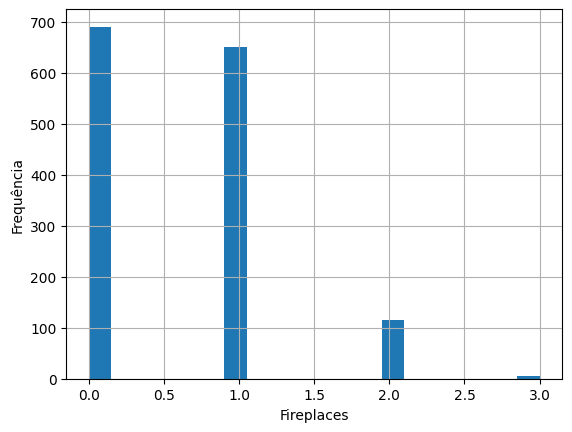

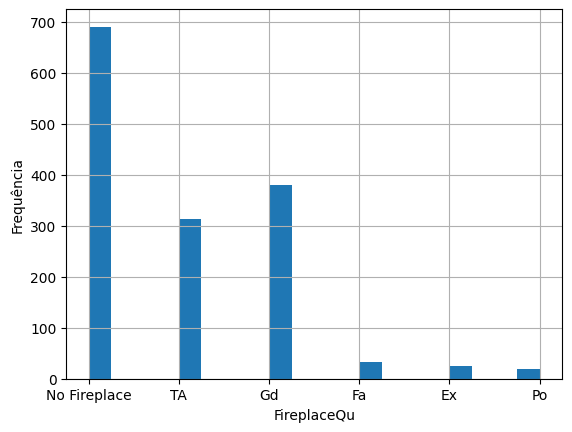

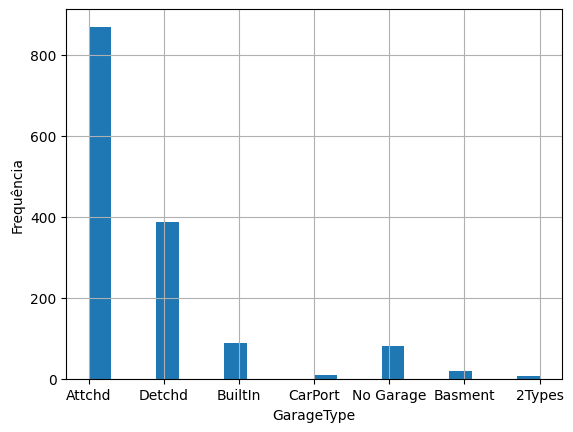

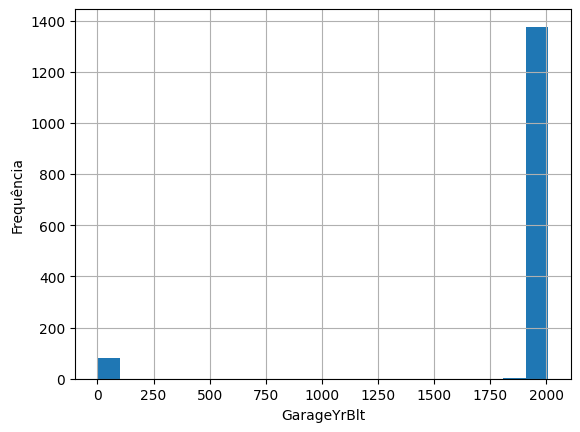

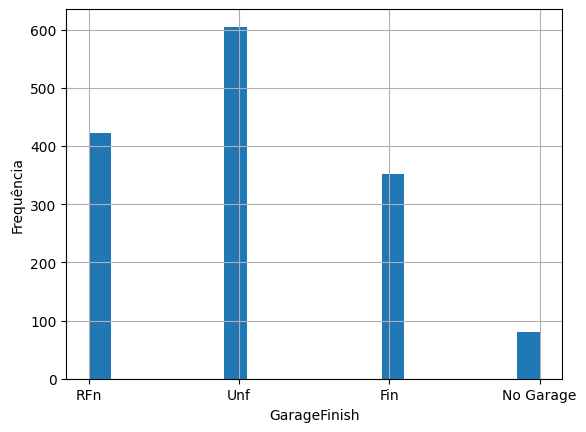

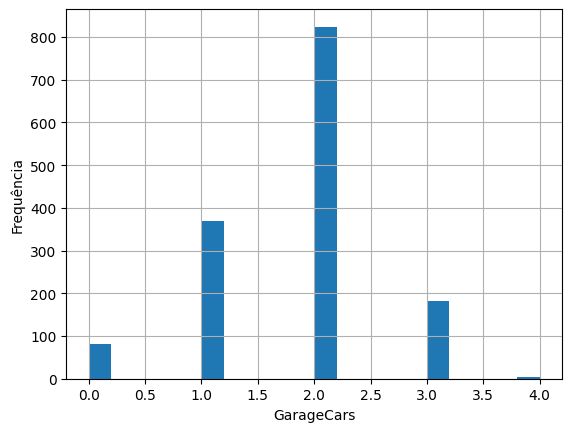

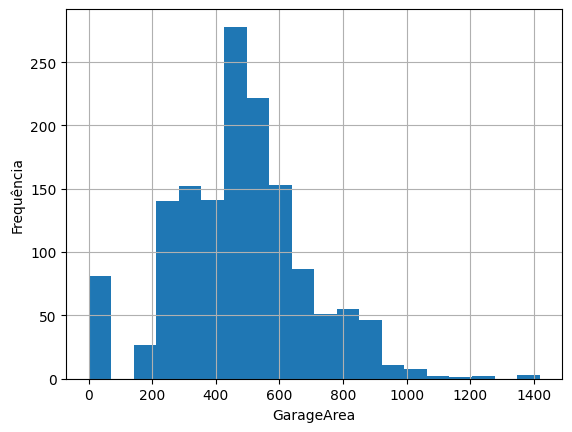

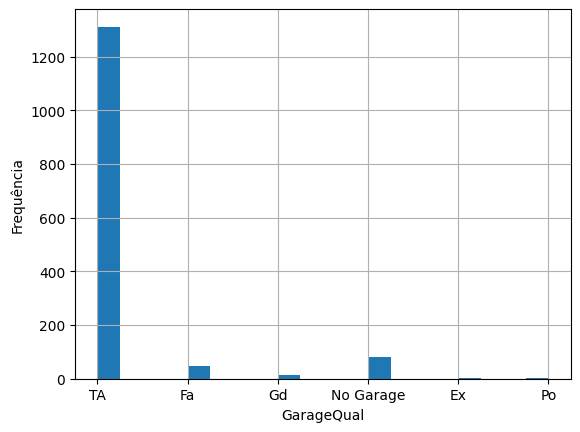

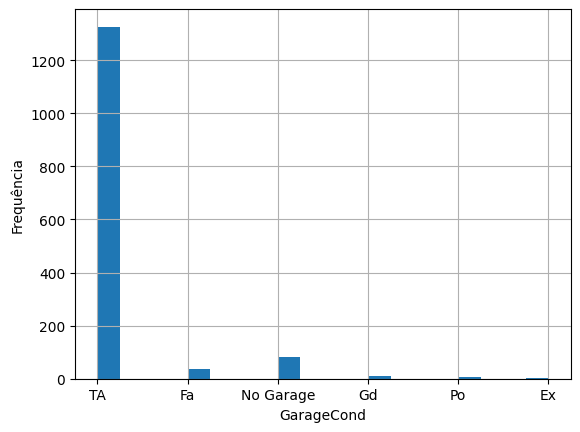

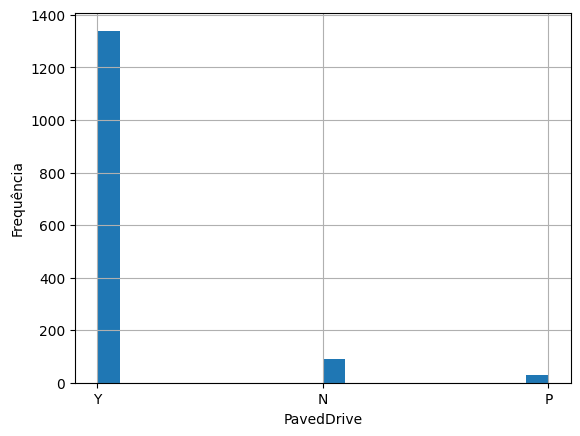

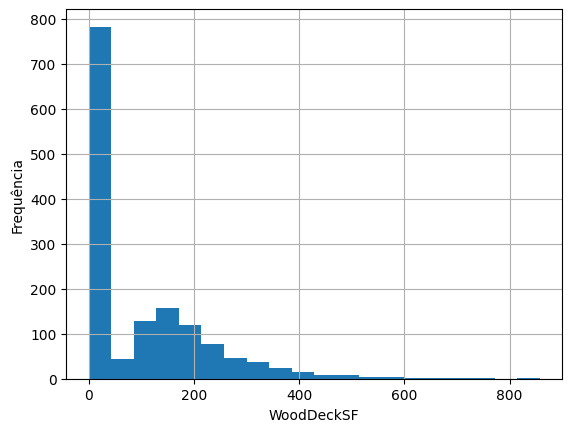

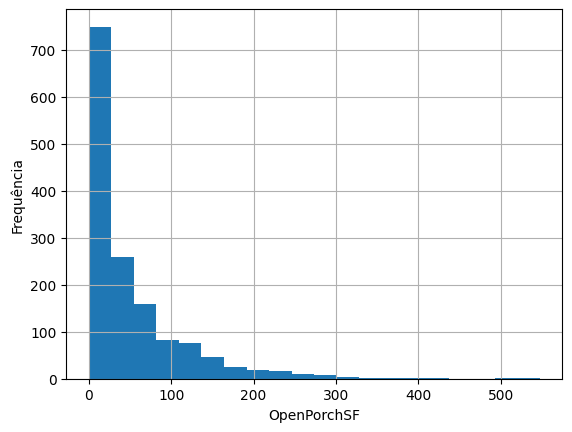

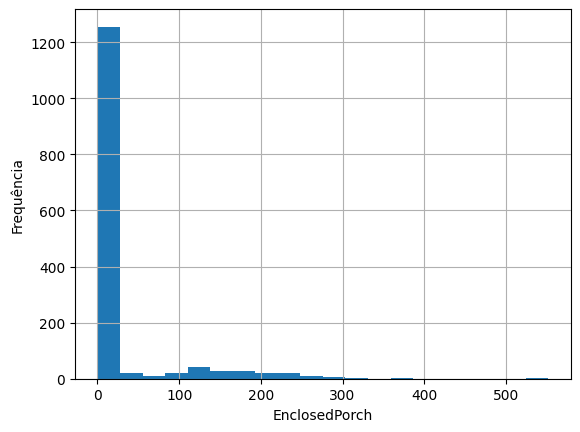

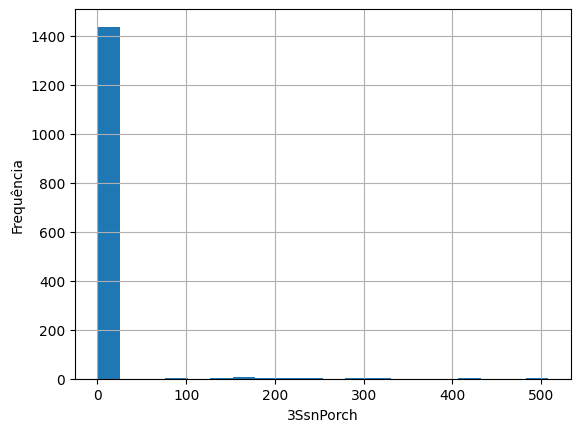

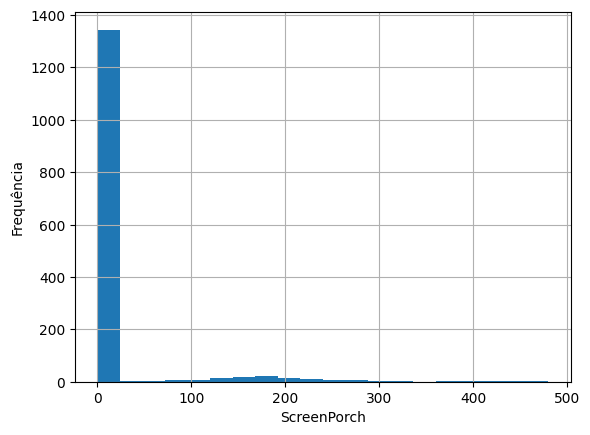

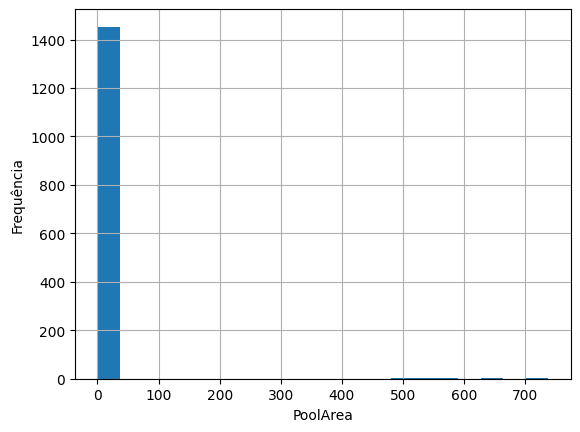

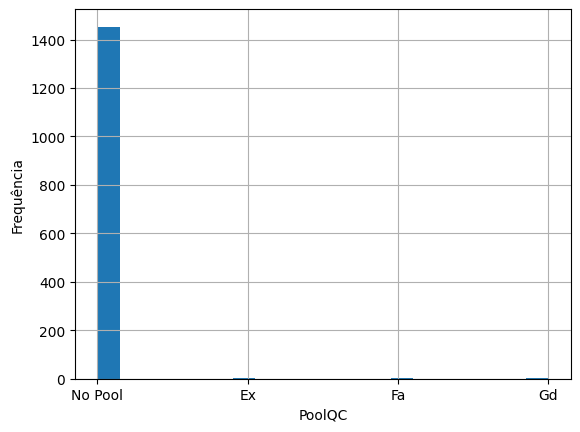

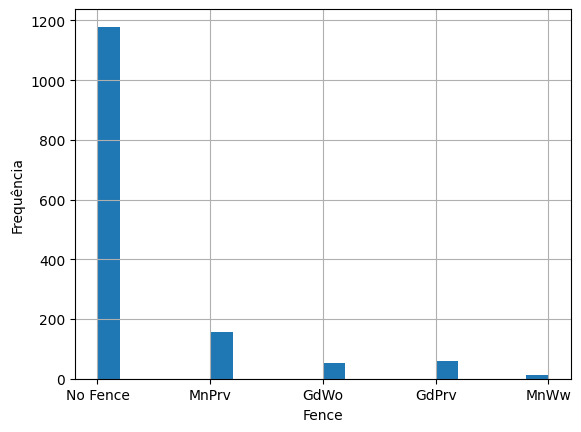

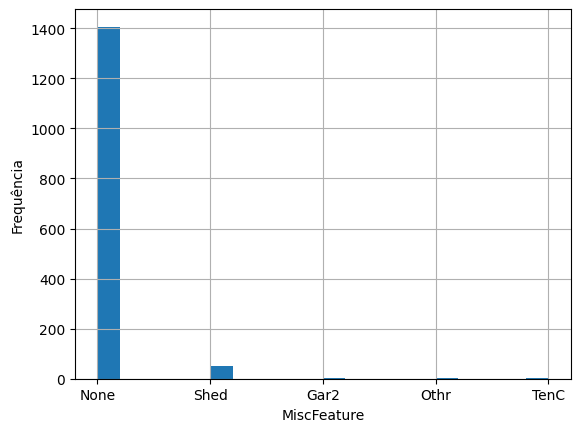

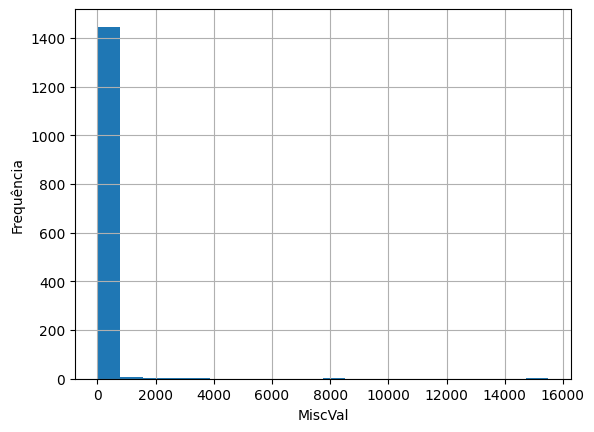

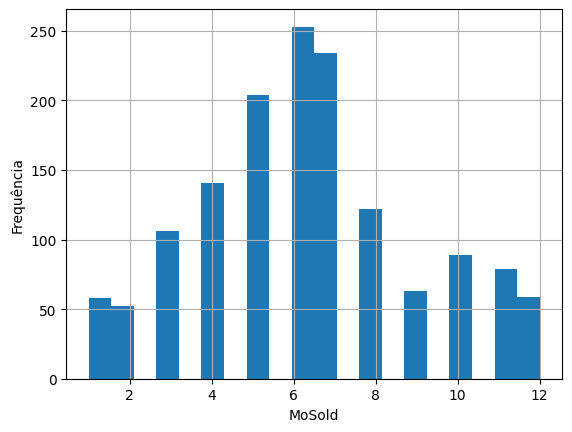

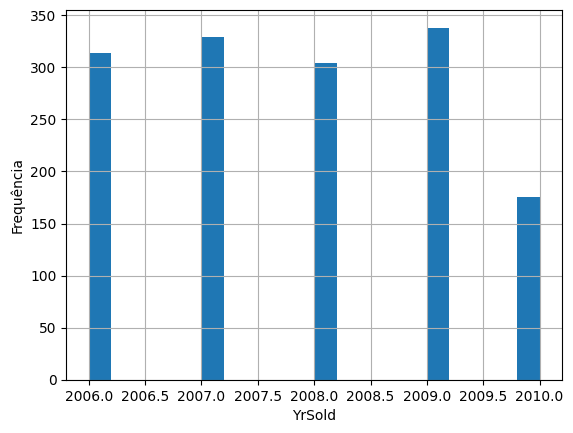

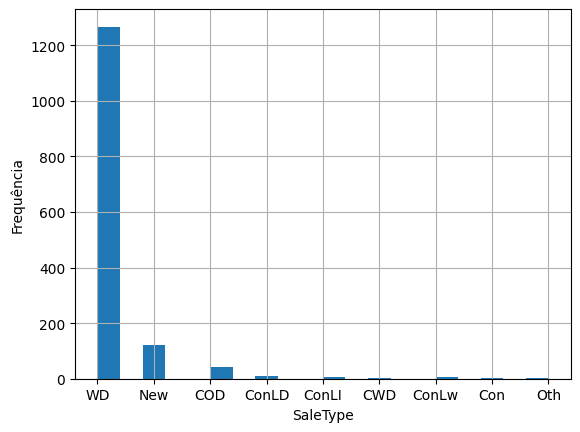

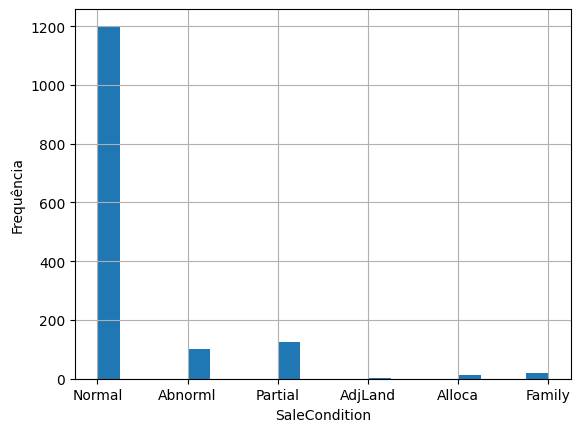

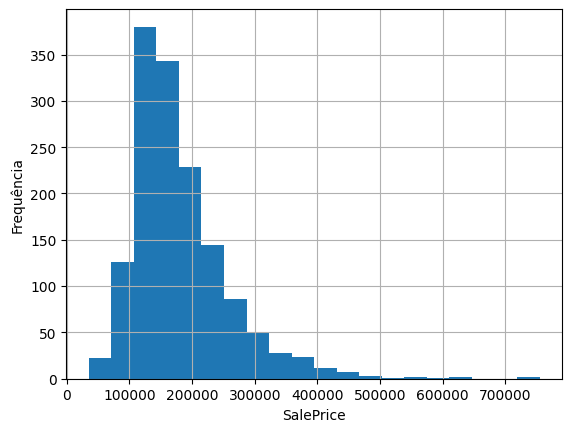

In [4]:
import matplotlib.pyplot as plt

for coluna in traindf:
    plt.figure()
    traindf[coluna].hist(bins=20)
    plt.xlabel(f'{coluna}')
    plt.ylabel('Frequência')
    plt.show()


In [5]:
from sklearn.model_selection import train_test_split

x = traindf.drop(columns=['SalePrice'])
y = traindf.loc[:,['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,None,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,No Fireplace,No Garage,0.0,No Garage,0,0,No Garage,No Garage,P,328,0,164,0,0,0,No Pool,MnPrv,None,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,No Alley Access,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,No Pool,MnPrv,None,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,No Pool,No Fence,None,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,No Pool,No Fence,None,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,No Pool,MnPrv,None,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,No Fireplace,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,No Pool,No Fence,None,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,No Alley Access,Reg,Lvl,AllPub,Corner,G

In [6]:
from sklearn.preprocessing import OneHotEncoder
onehots = ['MSSubClass','MSZoning','Street','Alley','LotShape',
           'LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType',
           'HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType',
           'Foundation',
           'BsmtFinType1','BsmtFinType2','Heating',
           'CentralAir','Electrical','Functional','PavedDrive',
           'GarageType','MiscFeature','SaleType','SaleCondition']
df_train_final = X_train.copy()
df_test_final = X_test.copy()

for col in onehots:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    encoded_train = encoder.fit_transform(X_train[[col]])
    df_encoded_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out([col]), index=X_train.index)
    
    encoded_test = encoder.transform(X_test[[col]])
    df_encoded_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out([col]), index=X_test.index)

    df_train_final = pd.concat([df_train_final.drop(col, axis=1), df_encoded_train], axis=1)
    df_test_final = pd.concat([df_test_final.drop(col, axis=1), df_encoded_test], axis=1)



In [7]:
from sklearn.preprocessing import OrdinalEncoder
categories = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['No Basement', 'No', 'Mn', 'Av', 'Gd'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['No Garage', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['No Pool', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['No Fence', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}
colunas = ['ExterQual', 'ExterCond', 'HeatingQC',
           'BsmtQual', 'BsmtCond', 'BsmtExposure',
           'KitchenQual', 'FireplaceQu', 'GarageFinish',
           'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
encoders = {}

for col in colunas:
    encoder = OrdinalEncoder(categories=[categories[col]])
    df_train_final[col + '_encoded'] = encoder.fit_transform(df_train_final[[col]])
    encoders[col] = encoder

for col in colunas:
    df_test_final[col + '_encoded'] = encoders[col].transform(df_test_final[[col]])

df_train_final.drop(colunas, axis=1, inplace=True)

df_test_final.drop(colunas, axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler

stdsy = StandardScaler()
y_train_final = stdsy.fit_transform(y_train)
y_test_final = stdsy.transform(y_test)

colunas_stds = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                'BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr',
                'TotRmsAbvGrd',	'Fireplaces','GarageCars',	'GarageArea',	'WoodDeckSF',	'OpenPorchSF',
                'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
scaler = StandardScaler()
df_train_final[colunas_stds] = scaler.fit_transform(df_train_final[colunas_stds])
df_test_final[colunas_stds] = scaler.transform(df_test_final[colunas_stds])

In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
y_true = stdsy.inverse_transform(y_test_final)

rf = RandomForestRegressor().fit(df_train_final, y_train_final)
y_pred_rf = rf.predict(df_test_final)
y_pred_rf = stdsy.inverse_transform(y_pred_rf.reshape(-1, 1))
print('Resultados RandomForest')
print(r2_score(y_pred_rf, y_true))
print(mean_absolute_error(y_pred_rf, y_true))
print(mean_squared_error(y_pred_rf, y_true))

xg = XGBRFRegressor().fit(df_train_final, y_train_final)
y_pred_xg = xg.predict(df_test_final)
y_pred_xg = stdsy.inverse_transform(y_pred_xg.reshape(-1, 1))
print('Resultados XGBoost')
print(r2_score(y_pred_xg, y_true))
print(mean_absolute_error(y_pred_xg, y_true))
print(mean_squared_error(y_pred_xg, y_true))




C:\Users\jaums\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Resultados RandomForest
0.8439318162838252
17469.186643835616
836733681.3844529
Resultados XGBoost
0.826437084396201
19683.89231057363
929675027.9074796


In [10]:
def csv_anova(model, x_train, y_train, cv):
    from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
    from sklearn.model_selection import cross_val_score
    r2_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='r2')
    
    msr_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')

    mae_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')

    r2_df = pd.DataFrame(r2_cv, columns=['R2']).to_csv(f'estimador = {model}_r2_df_com_{cv}_crossvalidations.csv', index=False)
    msr_df = pd.DataFrame(msr_cv, columns=['MSR']).to_csv(f'estimador = {model}_MSR_df_com_{cv}_crossvalidations.csv', index=False)
    mae_df = pd.DataFrame(mae_cv, columns=['MAE']).to_csv(f'estimador = {model}_MAE_df_com_{cv}_crossvalidations.csv', index=False)

def realizar_anova_tukey_boxplot(csv_files, group_names, target_column):
    """
    Realiza análise ANOVA e teste de Tukey para os arquivos CSV fornecidos.

    Parameters:
    csv_files (list of str): Lista de caminhos para os arquivos CSV.
    group_names (list of str): Lista de nomes dos grupos correspondentes.
    target_column (str): Nome da coluna de interesse para análise ANOVA e teste de Tukey.

    Returns:
    None
    """
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import seaborn as sns
    import matplotlib.pyplot as plt

    if len(csv_files) != len(group_names):
        raise ValueError("O número de arquivos CSV deve ser igual ao número de nomes dos grupos.")

    dataframes = []
    for i, (file, group) in enumerate(zip(csv_files, group_names)):
        df = pd.read_csv(file)
        df['grupo'] = group
        dataframes.append(df)
    
    df = pd.concat(dataframes, ignore_index=True)
 
    if target_column not in df.columns:
        raise ValueError(f"A coluna '{target_column}' não foi encontrada nos dados.")
    
    df['grupo'] = df['grupo'].astype('category')
    
    # Análise ANOVA
    formula = f'{target_column} ~ C(grupo)'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("Tabela ANOVA:")
    print(anova_table)
    
    # Teste de Tukey
    tukey = pairwise_tukeyhsd(endog=df[target_column], groups=df['grupo'], alpha=0.05)
    print("\nTeste de Tukey:")
    print(tukey)
    
    # Boxplot
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='grupo', y=target_column, data=df)

    for i, group in enumerate(df['grupo'].unique()):
        group_data = df[df['grupo'] == group][target_column]
        quartiles = np.percentile(group_data, [25, 50, 75])
        whiskers = [group_data.min(), group_data.max()]

        ax.text(i, quartiles[0], f'{quartiles[0]:.7f}', horizontalalignment='center', size='small', color='black', weight='semibold')
        ax.text(i, quartiles[1], f'{quartiles[1]:.7f}', horizontalalignment='center', size='small', color='black', weight='semibold')
        ax.text(i, quartiles[2], f'{quartiles[2]:.7f}', horizontalalignment='center', size='small', color='black', weight='semibold')
        ax.text(i, whiskers[0], f'{whiskers[0]:.7f}', horizontalalignment='center', size='small', color='black', weight='semibold')
        ax.text(i, whiskers[1], f'{whiskers[1]:.7f}', horizontalalignment='center', size='small', color='black', weight='semibold')

    plt.xlabel('Grupo')
    plt.ylabel(target_column)
    plt.title(f'Boxplot de {target_column} por Grupo')
    plt.show()

def csv_anova_xgb(model, x_train, y_train, cv):
    from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
    from sklearn.model_selection import cross_val_score
    r2_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='r2')
    
    msr_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')

    mae_cv = cross_val_score(estimator=model, X= x_train, y=y_train, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')

    r2_df = pd.DataFrame(r2_cv, columns=['R2']).to_csv(f'estimador = xgb_r2_df_com_{cv}_crossvalidations.csv', index=False)
    msr_df = pd.DataFrame(msr_cv, columns=['MSR']).to_csv(f'estimador = xgb_MSR_df_com_{cv}_crossvalidations.csv', index=False)
    mae_df = pd.DataFrame(mae_cv, columns=['MAE']).to_csv(f'estimador = xgb_MAE_df_com_{cv}_crossvalidations.csv', index=False)

In [11]:
csv_anova(rf, df_train_final, y_train_final, 10)
csv_anova_xgb(xg, df_train_final, y_train_final, 10)

Tabela ANOVA:
            sum_sq    df         F    PR(>F)
C(grupo)  0.005820   1.0  4.638058  0.045074
Residual  0.022588  18.0       NaN       NaN

Teste de Tukey:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Random Forest XGBoost  -0.0341 0.0451 -0.0674 -0.0008   True
------------------------------------------------------------


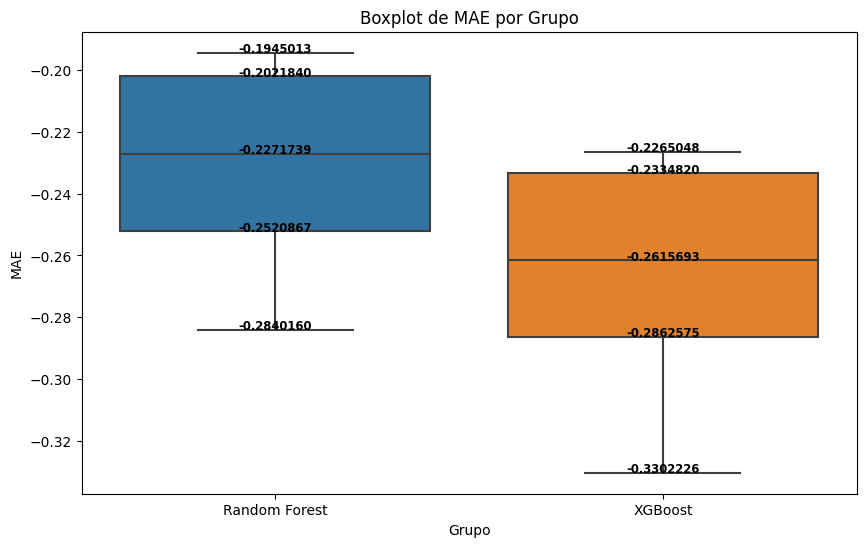

In [12]:
files = [r'C:\Users\jaums\OneDrive\Área de Trabalho\competitions\estimador = RandomForestRegressor()_MAE_df_com_10_crossvalidations.csv',
         r'C:\Users\jaums\OneDrive\Área de Trabalho\competitions\estimador = xgb_MAE_df_com_10_crossvalidations.csv']
group = ['Random Forest','XGBoost']
target = 'MAE'
realizar_anova_tukey_boxplot(files,group,target)

In [88]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': [int(x) for x in np.linspace(start=1, stop=500, num=5)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(df_train_final, y_train_final)

best_params = rf_random.best_params_
best_score = rf_random.best_score_
print(f"Melhores hiperparâmetros: {best_params}")
print(f"O melhor score foi {best_score}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\jaums\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Melhores hiperparâmetros: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 125, 'max_depth': 80}
O melhor score foi 0.861534002698976
